In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

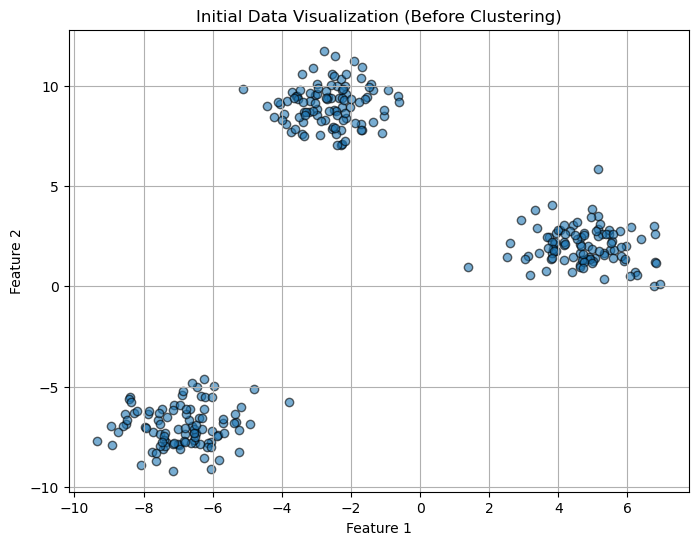

In [3]:
# If using real-world data, load the dataset with pd.read_csv().
# If using synthetic data, generate a dataset with make_blobs().
# Generate synthetic data with clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Convert to DataFrame
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Initial EDA: Scatter plot of raw data
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature_1'], data['Feature_2'], alpha=0.6, edgecolors='k')
plt.title('Initial Data Visualization (Before Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

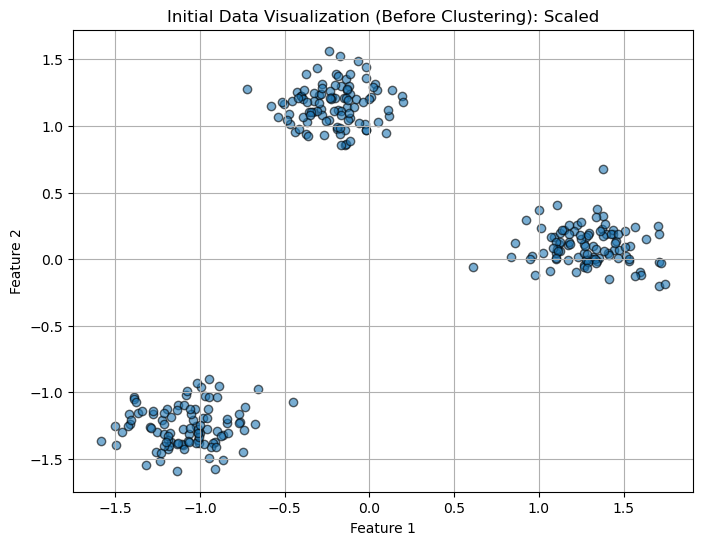

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initial EDA: Scatter plot of scaled data
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.6, edgecolors='k') # Access columns by index
plt.title('Initial Data Visualization (Before Clustering): Scaled')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

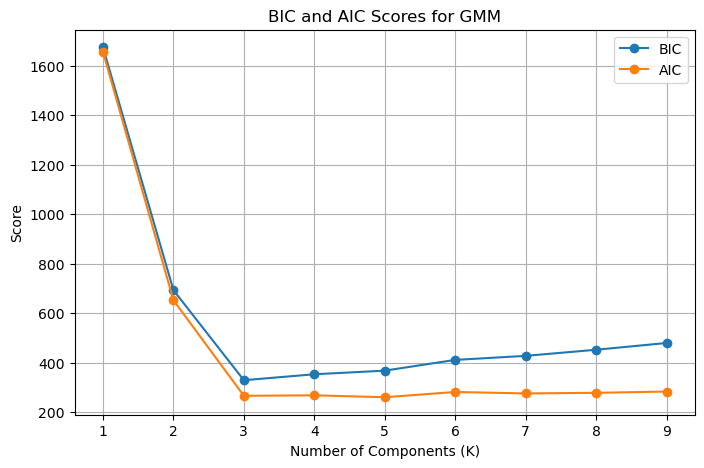

In [5]:
# Use the Elbow Method or BIC/AIC to determine an optimal K.
# Default to K=3 or K=4 if exploratory analysis is not required.
bic_scores = []
aic_scores = []
k_values = range(1, 10)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))
    aic_scores.append(gmm.aic(data_scaled))

# Plot BIC and AIC to find optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', label='BIC')
plt.plot(k_values, aic_scores, marker='o', linestyle='-', label='AIC')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC Scores for GMM')
plt.grid(True)
plt.show()

In [6]:
optimal_k = 3  # Adjust based on BIC/AIC analysis
gmm = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10)
gmm.fit(data_scaled)

# Predict cluster probabilities
probs = gmm.predict_proba(data_scaled)

# Assign clusters based on max probability
cluster_assignments = gmm.predict(data_scaled)

In [7]:
# Compute minimum probability per point
min_prob = np.min(probs, axis=1)

# Define anomaly threshold (5th percentile)
threshold = np.percentile(min_prob, 5)

# Identify anomalies
anomalies = data[min_prob < threshold]

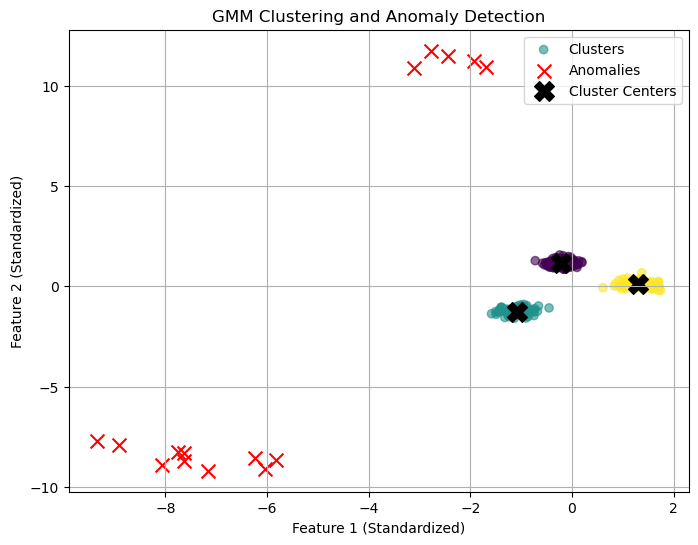

In [8]:
plt.figure(figsize=(8, 6))

# Scatter plot of all data points
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6, label="Clusters")

# Highlight anomalies
plt.scatter(anomalies['Feature_1'], anomalies['Feature_2'], color='red', marker='x', s=100, label="Anomalies")

# Plot cluster centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='black', marker='X', label="Cluster Centers")

plt.title('GMM Clustering and Anomaly Detection')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()